#**Importing Libraries**

In [111]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

#For data scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#Different ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

#For model diagnosis
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#for cross validation and spliting the data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# **Importing The Data**

In [112]:
df = pd.read_excel("updated data.xlsx")
df.head()

,Flowrate,Velocity,Density,Congestion
0,0,23.29,0.000000,0
1,0,14.80,0.000000,0
2,0,30.94,0.000000,0
3,1592,15.45,103.042071,1
4,1772,18.08,98.008850,0


#**Checking The Co- Relation With The Help Of A Heat Map**

<Axes: >

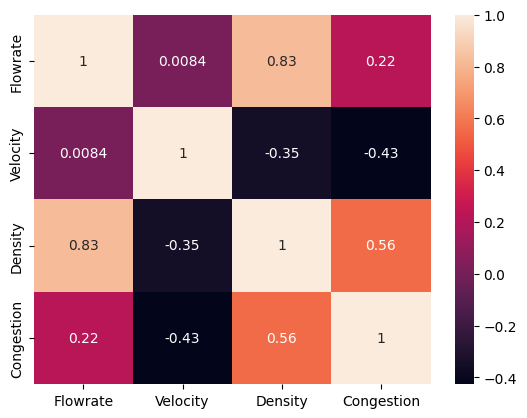

In [113]:
import seaborn as sns
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns,annot=True)

#**Visualizing The 3D View On The Data**

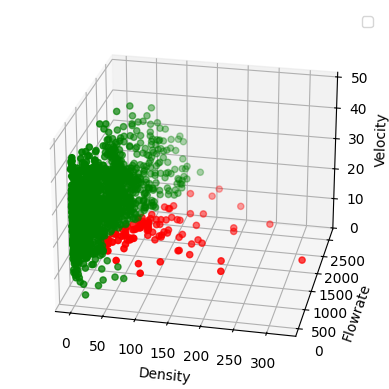

In [114]:
#DATA IN 3D VIEW
ax = plt.axes(projection = "3d")
X1 = df[df.Congestion == 0 ]
X2 = df[df.Congestion == 1 ]

ax.scatter(X1["Density"], X1["Flowrate"], X1["Velocity"], color = "green")
ax.scatter(X2["Density"], X2["Flowrate"], X2["Velocity"], color = "red")

# Set axis labels
ax.set_xlabel("Density")
ax.set_ylabel("Flowrate")
ax.set_zlabel("Velocity")

# Show the legend
ax.legend()

# Rotate the plot to make the axis labels visible
ax.view_init(25, -78)


#**Defining The Inputs And Outputs Of The Data**

In [115]:
#Defineing the input
X = df.drop(columns = ["Congestion"])
#Defineing the output
y = df.drop(columns = ["Flowrate", "Velocity", "Density"])


#**Defining And Scaling The Data**

In [116]:
#Scaleing the output data
scaler_ss = StandardScaler ()
scaler_mms = MinMaxScaler()
scaler_rbs = RobustScaler()
X_ss = scaler_ss.fit_transform (X)
X_mms = scaler_mms.fit_transform(X)
X_rbs = scaler_rbs.fit_transform(X)


#**Selecting The Best Model Through Model Comparison**

In [117]:
# List of different ML Models
models = [RandomForestClassifier(random_state = 0),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier(),
          LogisticRegression(),
          SVC(kernel= "sigmoid"),
          RidgeClassifier(),
          DecisionTreeClassifier()]


In [118]:

#Scaled Data List
scaler_list = [X_ss, X_mms, X_rbs]
scaler_names = ["StandardScaler", "MinMaxScaler", "RobustScaler"]



In [119]:

def Compairing_models(models):
    n = 0
    for scaler_X in scaler_list:
      print(f"model selection on {scaler_names[n]} DATA")
      n += 1
      for model in models:
        CV= cross_val_score(model, scaler_X , y.values.ravel() , cv=10, scoring = "f1_weighted")
        Mean_Score = np.mean(CV)
        print(f"Corss validation accuracy for the {model} = {CV}")
        print(f"Accuracy of the {model} = {Mean_Score}")
        print()
        print("--------------------------------------------------------------------------------------------------------------")
      print("--------------------------------------------------------------------------------------------------------------------------------")


In [ ]:
Compairing_models(models)

model selection on StandardScaler DATA
Corss validation accuracy for the RandomForestClassifier(random_state=0) = [1.         1.         1.         1.         0.9713271  1.
 1.         0.99344813 1.         0.99369083]
Accuracy of the RandomForestClassifier(random_state=0) = 0.995846606391825

--------------------------------------------------------------------------------------------------------------
Corss validation accuracy for the AdaBoostClassifier() = [1.         1.         1.         0.99343199 1.         1.
 1.         0.99344813 1.         1.        ]
Accuracy of the AdaBoostClassifier() = 0.9986880124259082

--------------------------------------------------------------------------------------------------------------
Corss validation accuracy for the GradientBoostingClassifier() = [1.         1.         1.         1.         1.         1.
 1.         0.99344813 1.         0.98180628]
Accuracy of the GradientBoostingClassifier() = 0.9975254408309869

-------------------------

#**Optimizing The Selected Model Through Hyper – Parameter Tunning**

In [ ]:
#Defining the model
model=  AdaBoostClassifier()
classifier = GridSearchCV(AdaBoostClassifier(),{
        "n_estimators" : [1, 10, 15, 20, 25, 50, 75, 100, 200, 250, 500],
        "learning_rate" : [0.0001, 0.001, 0.01, 0.02,
                           0.05, 0.07, 1],
        "algorithm" : ["SAMME", "SAMME.R"]
    }, cv = 10, scoring = "f1_weighted")



In [122]:
#fitting data to the classifier
classifier.fit(X_ss, y.values.ravel())


GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.02, 0.05,
                                           0.07, 1],
                         'n_estimators': [1, 10, 15, 20, 25, 50, 75, 100, 200,
                                          250, 500]},
             scoring='f1_weighted')

In [123]:
#optimum parameters
result = []
result.append({
            "model used" : model,
            "best parameters" : classifier.best_params_,
            "highest accuracy score" : classifier.best_score_
        })
result_df = pd.DataFrame(result, columns = ["model used", "highest accuracy score", "best parameters"])


In [124]:

#whole result
result_data = classifier.cv_results_
rd = pd.DataFrame(result_data, columns = ["params", "mean_test_score"])


In [125]:

result_df

,model used,highest accuracy score,best parameters
0,AdaBoostClassifier(),0.998688,"{'algorithm': 'SAMME', 'learning_rate': 0.05, ..."


In [126]:
rd

,params,mean_test_score
0,"{'algorithm': 'SAMME', 'learning_rate': 0.0001...",0.877258
1,"{'algorithm': 'SAMME', 'learning_rate': 0.0001...",0.877258
2,"{'algorithm': 'SAMME', 'learning_rate': 0.0001...",0.877258
3,"{'algorithm': 'SAMME', 'learning_rate': 0.0001...",0.877258
4,"{'algorithm': 'SAMME', 'learning_rate': 0.0001...",0.877258
...,...,...
149,"{'algorithm': 'SAMME.R', 'learning_rate': 1, '...",NaN
150,"{'algorithm': 'SAMME.R', 'learning_rate': 1, '...",NaN
151,"{'algorithm': 'SAMME.R', 'learning_rate': 1, '...",NaN
152,"{'algorithm': 'SAMME.R', 'learning_rate': 1, '...",NaN


#**Making Pipeline of The Model**

In [127]:
#Splitting the data in train, test and Cross validation set
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [128]:
trf1 = StandardScaler()

In [129]:
trf2 = AdaBoostClassifier(n_estimators = 250, learning_rate = 0.05,algorithm = "SAMME")

In [130]:
abc = Pipeline([
    ("trf1", trf1),
    ("trf2", trf2)
])

In [131]:
abc.fit(X_train, y_train)

Pipeline(steps=[('trf1', StandardScaler()),
                ('trf2',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.05,
                                    n_estimators=250))])

#**Testing The Model Through Different Evaluation Methods**

In [132]:
#Predicting the result of test set through our model
y_pred_test = abc.predict(X_test)
print("How well our model perfoms on the test set")

#Finding the accuracy of our test set prediction through our model
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)
roc_acu = auc(false_positive_rate, true_positive_rate)
print(f"Accuracy value = {roc_acu}")

#Finding the F1 score of our test set through our model
f1 = f1_score(y_test, y_pred_test)
print(f"F1 Score = {f1}")

#Printing the confusion matrix
print(f"Confusion Matrix = {confusion_matrix(y_test, y_pred_test)}")

#Printing The Classification report
print(f"Classification Report = {classification_report(y_test, y_pred_test)}")


How well our model perfoms on the test set
Accuracy value = 1.0
F1 Score = 1.0
Confusion Matrix = [[442   0]
 [  0  26]]
Classification Report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       1.00      1.00      1.00        26

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



#**Diagnosing The Model Through Cross Validation**

In [133]:
scores= cross_val_score(abc, X, y.values.ravel(), cv = 10, scoring = "f1_weighted")
scores

print("After cross validation")
print(f"Coefficient of determination ={np.mean(scores)}")


After cross validation
Coefficient of determination =0.9986880124259082


#**Dumping the model in a separate file which can be used in any other IDE**

In [134]:
from joblib import dump, load
filename = "FYP_ML_model.joblib"
dump(abc, filename)


['FYP_ML_model.joblib']